# Titanic Survival Prediction using Machine Learning

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

We're going to take the following approch:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definiation
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [138]:
import datetime
print(f"Last update: {datetime.datetime.now()}")

Last update: 2024-04-12 11:18:54.440957


In [139]:
# 0. Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans

# We want our plots apprear inside the notebook
%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

In [171]:
# 1. Getting the data ready
titanic_df = pd.read_csv("data/Titanic-Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Classification Predictive Modeling
Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation.

For example, an email of text can be classified as belonging to one of two classes: “spam“ and “not spam“.

* classification problem requires that examples be classified into one of two or more classes.
* classification can have real-valued or discrete input variables.
* problem with two classes is often called a two-class or binary classification problem.
* problem with more than two classes is often called a multi-class classification problem.
* problem where an example is assigned multiple classes is called a multi-label classification problem.

For more information about diffrences between `classification` and  `regression` go here: https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/
  

In [172]:
titanic_df.shape

(891, 12)

In [173]:
titanic_df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [174]:
titanic_df["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

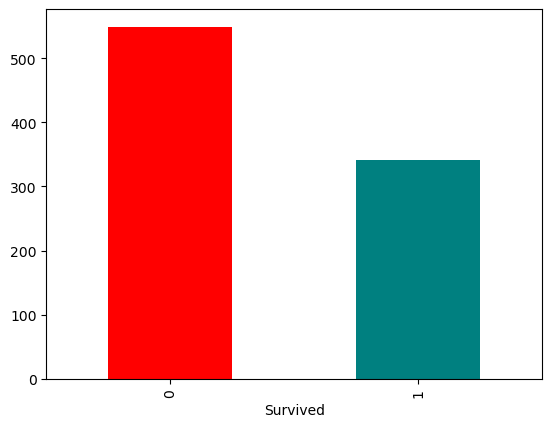

In [175]:
titanic_df["Survived"].value_counts().plot(kind="bar", color=["red", "teal"])

In [176]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [177]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Surviaval Frequency according to Sex

In [179]:
titanic_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [180]:
# Compare Survived column with Sex column
pd.crosstab(titanic_df.Survived, titanic_df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

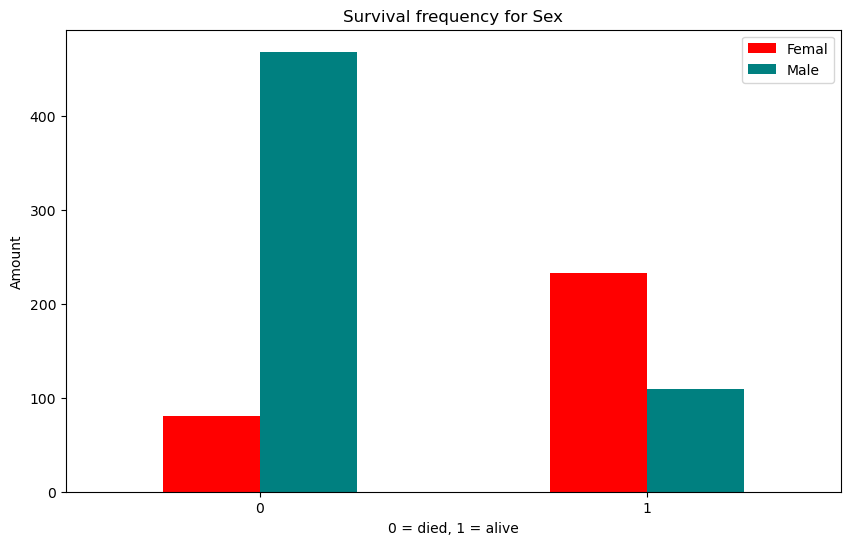

In [181]:
# create a plot of crosstab
pd.crosstab(titanic_df.Survived, titanic_df.Sex).plot(kind="bar",
                                                      figsize=(10, 6),
                                                      color=["red", "teal"])
plt.title("Survival frequency for Sex")
plt.xlabel("0 = died, 1 = alive")
plt.ylabel("Amount")
plt.legend(["Femal", "Male"])
plt.xticks(rotation=0)


## Fill Missing Values

### Fill numerical missing values first

In [182]:
for label, content in titanic_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [183]:
# check for which numeric columns have null values
for label, content in titanic_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [184]:
# Fill numeric rows with the median
for label, content in titanic_df.items():
    if pd.api.types.is_numeric_dtype(content):
        # add a binary column which tells us if the data was missing or not
        titanic_df[label+"_is_missing"] = pd.isnull(content)
        # Fill missing numeric values with median
        titanic_df[label] = content.fillna(content.median())
        

In [185]:
# Demonstrate how median is more robus than mean
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

## Convert string to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [186]:
# These columns contain strings
for label, content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket


In [187]:
# This will turn all of the string values into category values
for label, content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):
        titanic_df[label] = content.astype("category").cat.as_ordered()

In [188]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             891 non-null    int64   
 1   Survived                891 non-null    int64   
 2   Pclass                  891 non-null    int64   
 3   Name                    891 non-null    category
 4   Sex                     891 non-null    category
 5   Age                     891 non-null    float64 
 6   SibSp                   891 non-null    int64   
 7   Parch                   891 non-null    int64   
 8   Ticket                  891 non-null    category
 9   Fare                    891 non-null    float64 
 10  Cabin                   204 non-null    object  
 11  Embarked                889 non-null    object  
 12  PassengerId_is_missing  891 non-null    bool    
 13  Survived_is_missing     891 non-null    bool    
 14  Pclass_is_missing       89

In [189]:
# Check if there is any null numeric values
for label, content in titanic_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [190]:
titanic_df.isna().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2
PassengerId_is_missing      0
Survived_is_missing         0
Pclass_is_missing           0
Age_is_missing              0
SibSp_is_missing            0
Parch_is_missing            0
Fare_is_missing             0
dtype: int64

## Filling and turning categorical variables into numbers

Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [191]:
# Check columns which *aren't* numeric
for label, content in titanic_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [192]:
# Turn categorical variabels into number
for label, content in titanic_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        titanic_df[label+"_is_missing"] = pd.isnull(content)
        titanic_df[label] = pd.Categorical(content).codes+1

In [205]:
# Convert is_missing columns from bool dtype to int
for label, content in titanic_df.items():
    if pd.api.types.is_bool_dtype(content):
        titanic_df[label] = titanic_df[label].astype(int)

In [207]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Name                    891 non-null    int16  
 4   Sex                     891 non-null    int8   
 5   Age                     891 non-null    float64
 6   SibSp                   891 non-null    int64  
 7   Parch                   891 non-null    int64  
 8   Ticket                  891 non-null    int16  
 9   Fare                    891 non-null    float64
 10  Cabin                   891 non-null    int16  
 11  Embarked                891 non-null    int8   
 12  PassengerId_is_missing  891 non-null    int32  
 13  Survived_is_missing     891 non-null    int32  
 14  Pclass_is_missing       891 non-null    in

In [208]:
titanic_df.isnull().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                     0
Embarked                  0
PassengerId_is_missing    0
Survived_is_missing       0
Pclass_is_missing         0
Age_is_missing            0
SibSp_is_missing          0
Parch_is_missing          0
Fare_is_missing           0
Name_is_missing           0
Sex_is_missing            0
Ticket_is_missing         0
Cabin_is_missing          0
Embarked_is_missing       0
dtype: int64

In [212]:
# Feature
X = titanic_df.drop('Survived', axis=1)

#Target
y = titanic_df["Survived"]

In [213]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Pclass                  891 non-null    int64  
 2   Name                    891 non-null    int16  
 3   Sex                     891 non-null    int8   
 4   Age                     891 non-null    float64
 5   SibSp                   891 non-null    int64  
 6   Parch                   891 non-null    int64  
 7   Ticket                  891 non-null    int16  
 8   Fare                    891 non-null    float64
 9   Cabin                   891 non-null    int16  
 10  Embarked                891 non-null    int8   
 11  PassengerId_is_missing  891 non-null    int32  
 12  Survived_is_missing     891 non-null    int32  
 13  Pclass_is_missing       891 non-null    int32  
 14  Age_is_missing          891 non-null    in

In [214]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [215]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_is_missing,Age_is_missing,SibSp_is_missing,Parch_is_missing,Fare_is_missing,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,3,109,2,22.0,1,0,524,7.2500,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,191,1,38.0,1,0,597,71.2833,82,...,0,0,0,0,0,0,0,0,0,0
2,3,3,354,1,26.0,0,0,670,7.9250,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,273,1,35.0,1,0,50,53.1000,56,...,0,0,0,0,0,0,0,0,0,0
4,5,3,16,2,35.0,0,0,473,8.0500,0,...,0,0,0,0,0,0,0,0,1,0


In [216]:
# Random seed 
np.random.seed(42)

# Trainig and test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y, 
                                                     test_size=0.2)
                                                   

In [220]:
X_train.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_is_missing,Age_is_missing,SibSp_is_missing,Parch_is_missing,Fare_is_missing,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
106,107,3,725,1,21.0,0,0,297,7.6500,0,...,0,0,0,0,0,0,0,0,1,0
270,271,1,126,2,28.0,0,0,48,31.0000,0,...,0,1,0,0,0,0,0,0,1,0
860,861,3,326,2,41.0,2,0,400,14.1083,0,...,0,0,0,0,0,0,0,0,1,0
435,436,1,144,1,14.0,1,2,34,120.0000,48,...,0,0,0,0,0,0,0,0,0,0
102,103,1,859,2,21.0,0,1,418,77.2875,99,...,0,0,0,0,0,0,0,0,0,0


In [221]:
# Put model in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fix and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train: training data (no labels).
    X_test: testin data (no labels).
    y_train: trainig labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scored
        model_scores[name] = model.score(X_test, y_test)

    return model_scores



In [222]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

AttributeError: 'Flags' object has no attribute 'c_contiguous'